In [ ]:
import requests
def connected_to_internet(url='http://www.google.com/', timeout=50):
    try:
        _ = requests.get(url, timeout=timeout)
        return True
    except requests.ConnectionError:
        print("No internet connection available.")
    return False

connected_to_internet()

In [ ]:
#!pip install -r requirements.txt
#!pip install fxcmpy
#!pip install forexconnect
#!pip install sklearn
#!pip install statsmodels
#!pip install matplotlib
#!pip install ipywidgets
#!pip install scipy
#!pip install pymysql 
#!pip install pynverse
#!pip install datascience
#!pip install pomegranate

In [1]:
import os
import threading
import time
import importlib
import sys
import warnings
mpath = os.getcwd() + '/lib'
sys.path.append(mpath)

In [20]:
#from forexconnect import fxcorepy
import fxcmpyi
import pandas
import matplotlib

import SharedObjects
import pairs
import Copula
importlib.reload(Copula)
importlib.reload(SharedObjects)
importlib.reload(fxcmpyi)
importlib.reload(pairs)

import numpy

In [21]:
#fxcmpy.__version__

minutes: m1, m5, m15 and m30,
hours: H1, H2, H3, H4, H6 and H8,
one day: D1,
one week: W1,
one month: M1.

In [22]:
#Set variables
T = 'm1' #Period
sz = 1000; #Size
prs = dict()
pr_mlreg = dict()
mlr = pandas.DataFrame()

Get access token from https://tradingstation.fxcm.com.

demo - for account type demo

real - for account type real

In [13]:
con = None
def custom():
    global con
    try:
        def login():
            global con
            TOKEN = '2720337434ea557dea25bad4cd9ad392d70f620d'
            con = fxcmpyi.fxcmpy(access_token=TOKEN, log_level='error', server='demo')
            return
        threading.Thread(target=login).start()
    except:
        custom()
custom()
#con.close()

In [23]:
if con is not None:
    shd_obj = SharedObjects.SharedObjects(con)
    print(con.is_connected())

True


In [24]:
#Function to update data
def price_update(data = None, dataframe = None):
    symbol = data['Symbol']
    def misc():
        global pr_mlreg, mlr, shd_obj, prs
        if (symbol in prs):
            #pr_mlreg[symbol] = prs.get(symbol).multiple_linear_regression(prs)
            #mlr = shd_obj.mergeall_byrow(pr_mlreg)
            prs.get(symbol).standardize_prices()
            resp = prs.get(symbol).co_integration(prs, shd_obj.coint_mat, shd_obj.spreads)
            shd_obj.update(prs, resp[0], resp[1])
    threading.Thread(target=misc).start()

def stream():
    for symbol in shd_obj.tradable_pairs:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            shd_obj.stream_data(symbol, (price_update, prs.get(symbol).on_price_update) )

In [64]:
def get_past_prices():
    for symbol in shd_obj.tradable_pairs:
        dtf = shd_obj.historical_data(symbol, T, sz)
        if symbol not in prs:
            prs[symbol] = pairs.Pair(symbol, dtf)
            prs.get(symbol).standardize_prices()
            resp = prs.get(symbol).co_integration(prs, shd_obj.coint_mat, shd_obj.spreads)
            shd_obj.update(prs, resp[0], resp[1])
            
        syz = len(prs.get(symbol).standardized_prices)
        strm = False
        for sym in shd_obj.tradable_pairs:
            if(hasattr(prs.get(sym), 'standardized_prices') and syz == len(prs.get(sym).standardized_prices)):
                strm = True
            else:
                strm = False
        if(strm == True):
            threading.Thread(target=stream).start()
                
threading.Thread(target=get_past_prices).start()

#Stream Tradable Pairs

In [ ]:
#shd_obj.unstream_data()

In [ ]:
#con.close()

In [ ]:
#status = shd_obj.get_status()
#if(status == 'You are logged in'):
    #shd_obj.stream_data(T, sz, price_update)

In [ ]:
##Reverses the dataframe rows
#df[::-1]

#con.is_subscribed(instruments[0])
#con.get_subscribed_symbols()

#con.unsubscribe_market_data('EUR/USD')
#print(shd_obj.pairs)
#con.close()

In [ ]:
#con.get_default_account()
#con.get_prices('EUR/USD')

In [ ]:
#import inspect
#source_file_DF = inspect.getsource(pandas.DataFrame().join)
#print(source_file_DF)

In [68]:
shd_obj.coint_mat

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,AUD/USD,USD/CAD,NZD/USD,EUR/GBP,USD/ZAR,ZAR/JPY
EUR/USD,0.900246,0.178882,0.765023,0.083114,0.409703,0.455048,0.200540,0.322696,0.596739,0.378444
USD/JPY,0.645729,0.999000,0.644464,0.710255,0.301742,0.680185,0.642611,0.472778,0.654905,0.423305
GBP/USD,0.937788,0.269648,0.999000,0.419060,0.040670,0.006911,0.252419,0.217197,0.001067,0.010217
USD/CHF,0.247036,0.614233,0.744949,0.999000,0.643698,0.720937,0.586888,0.744029,0.764315,0.712842
AUD/USD,0.983099,0.535797,0.239785,0.953792,0.912670,0.375623,0.924129,0.035529,0.249195,0.010312
USD/CAD,0.950763,0.947776,0.055717,0.979110,0.493423,0.990510,0.957331,0.146088,0.002824,0.168628
NZD/USD,0.056541,0.064160,0.060879,0.048071,0.092380,0.069238,0.928314,0.083999,0.065476,0.064642
EUR/GBP,0.956401,0.751878,0.560730,0.945186,0.047684,0.142080,0.882690,0.980550,0.090914,0.064686
USD/ZAR,0.973357,0.858820,0.005912,0.969178,0.230950,0.001484,0.828157,0.063145,0.999000,0.067194
ZAR/JPY,0.671840,0.865790,0.027333,0.938404,0.009679,0.262731,0.711512,0.067259,0.081464,0.990565


In [82]:
plot0 = None
plot1 = None
def doplot():
    y = 'USD/CAD'
    x = 'GBP/USD'
    plot0 = shd_obj.pairwise_spreadplot(y, x)
    plot0 = shd_obj.pairwise_plot(y, x)
threading.Thread(target=doplot).start()

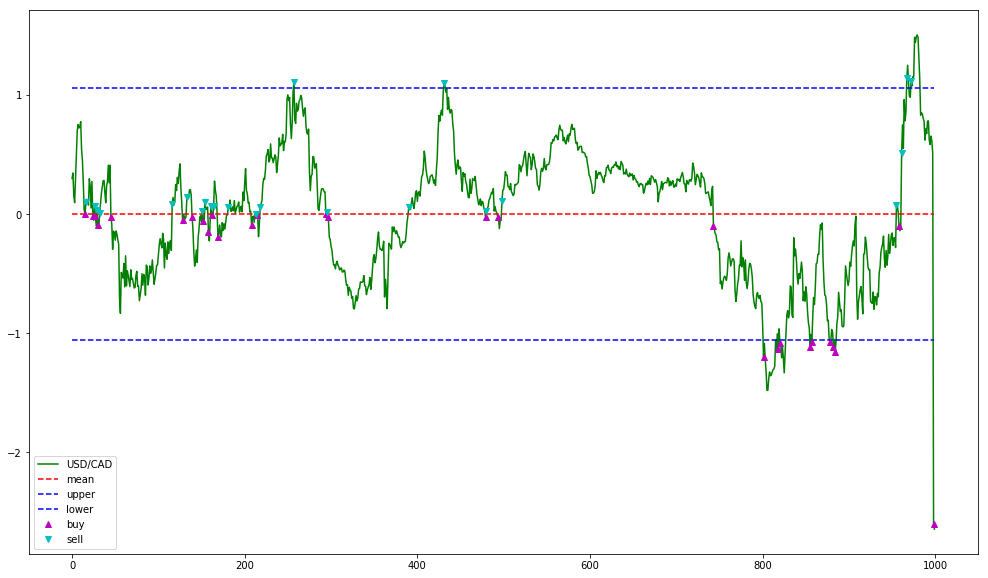

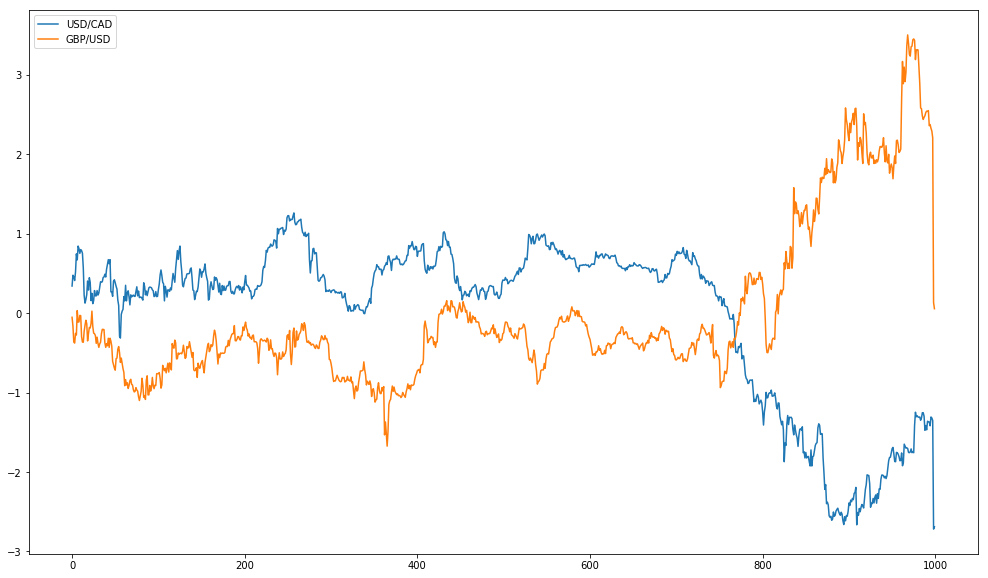

In [83]:
#Plots

In [36]:
#shd_obj.pair_selection()
shd_obj.ipairs
#shd_obj.corr_mat

[]

In [77]:
shd_obj.corr_mat

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,AUD/USD,USD/CAD,NZD/USD,EUR/GBP,USD/ZAR,ZAR/JPY
EUR/USD,0.000000,-0.120283,0.469104,-0.305844,0.184932,-0.375476,0.222130,0.060365,-0.342805,0.186876
USD/JPY,-0.120283,0.000000,0.143558,0.075757,0.545164,-0.065866,0.119612,-0.304438,-0.191372,0.582179
GBP/USD,0.469104,0.143558,0.000000,-0.345362,0.477423,-0.312645,0.236197,-0.469059,-0.443482,0.421401
USD/CHF,-0.305844,0.075757,-0.345362,0.000000,-0.081118,0.111248,0.117410,0.148587,-0.013712,-0.027895
AUD/USD,0.184932,0.545164,0.477423,-0.081118,0.000000,-0.369623,0.345460,-0.521079,-0.483914,0.740737
USD/CAD,-0.375476,-0.065866,-0.312645,0.111248,-0.369623,0.000000,-0.176574,0.183558,0.377229,-0.337402
NZD/USD,0.222130,0.119612,0.236197,0.117410,0.345460,-0.176574,0.000000,-0.116185,-0.252306,0.260078
EUR/GBP,0.060365,-0.304438,-0.469059,0.148587,-0.521079,0.183558,-0.116185,0.000000,0.377278,-0.487514
USD/ZAR,-0.342805,-0.191372,-0.443482,-0.013712,-0.483914,0.377229,-0.252306,0.377278,0.000000,-0.613406
ZAR/JPY,0.186876,0.582179,0.421401,-0.027895,0.740737,-0.337402,0.260078,-0.487514,-0.613406,0.000000


In [ ]:
#shd_obj.start = True
#shd_obj.start

In [ ]:
#importlib.reload(Copula)

In [55]:
#pr = shd_obj.ipairs[4]
#dat = pandas.DataFrame()
#dat[pr[0]] = shd_obj.dataset0[pr[0]]
#dat[pr[1]] = shd_obj.dataset0[pr[1]]
#cop = Copula.copula(prs, pr, dat)
#cop.misprice_index(dat)